___

<a href='http://www.stepupanalytics.com'> <img src='http://stepupanalytics.com/wp-content/uploads/2020/07/python.png' /></a>
___

# NAME: AYAN PAL || KU STAT || 2021 BATCH

**Tableau**
1. Installation (https://www.tableau.com/academic/students)
    For Download: https://www.tableau.com/products/desktop/download
    for licience: https://www.tableau.com/academic/students#form

2. How to apply for Student Key
3. On Saturday on Tableau

**UG Student Only**
Assignment that you need to submit for Certification,
UG Students can work on Real Estate Dataset if they want, Though you will not get evaluated on the same

**For PG Student only**
Real Estate data project
1. Project Data
2. How project needs to be done 
3. Submission
4. Mentorship

**Date of submission**
27th of September for **UG** Students and
10th of Oct for **PG** Students
Mode: Through Email
stepupanalytics1@gmail.com

This needs to be submitted individually

### Objective: Analyse the House Price in City of Bengaluru Based on Given Input

* 1. area_type: The area size given in total_square_feet is “Built-up Area”,” Super built-up Area”,” Plot Area” or “Carpet Area”
* 2. availability: The time by which the area is available and ready to end-users.
* 3. location: The area in Bengaluru where the area is located.
* 4. size: The size of area in BHK(Bedroom-Hall-Kitchen)
* 5. Society: The Name of the society in which the area is part of it. 
* 6. total_sqft: Total area in square feet of the area.
* 7. bath: This column gives number of bathrooms in the house.
* 8. balcony: This column gives number of Balconies in the house.
* 9. price: The cost of property in lakhs that need to be predicted.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('savefig', dpi=200)
plt.style.use('ggplot')
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

In [2]:
import plotly
import plotly.express as px
plt.rcParams['figure.figsize']=10,8

In [3]:
df=pd.read_csv('Karnataka_RealEstate_Data.csv')

In [4]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [5]:
df.isnull().sum()
## missing values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.describe(include='all')

area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   
mean                     NaN            NaN         NaN    NaN      NaN   
std                      NaN            NaN         NaN    NaN      NaN   
min                      NaN            NaN         NaN    NaN      NaN   
25%                      NaN            NaN         NaN    NaN      NaN   
50%                      NaN            NaN         NaN    NaN      NaN   
75%                      NaN            NaN         NaN    NaN      NaN   
max                      NaN            NaN         NaN    NaN      NaN   

       total_sqft          bath       balcony         price  
count       13320  13247.000000  12711.000000  13320.000000  
unique       2117           NaN           NaN           NaN  
top          1200           NaN           NaN           NaN  
freq          843           NaN           NaN           NaN  
mean          NaN      2.692610      1.584376    112.565627  
std           NaN      1.341458      0.817263    148.971674  
min           NaN      1.000000      0.000000      8.000000  
25%           NaN      2.000000      1.000000     50.000000  
50%           NaN      2.000000      2.000000     72.000000  
75%           NaN      3.000000      2.000000    120.000000  
max           NaN     40.000000      3.000000   3600.000000

# **Getting the numerical values only, from the 'size' column**

In [7]:
df['size']=df['size'].astype(str) 
## first we change the column to a str series using .astype(str)

df['new_size']=df['size'].str.get(0)
## then by .str.get(0) we only retrive the numerical values placed at the 0th position, and create a new column
## named new_size

df.drop('size',axis=1,inplace=True)
## dropping the previous column

## creating function to regain the missingness in the column 'size'
def function(val):
    if val=='n':
        return None
    else:
        return int(val)
        
df['new_size']=df['new_size'].apply(function)

In [8]:
df.head()

area_type   availability                  location  society  \
0  Super built-up  Area         19-Dec  Electronic City Phase II  Coomee    
1            Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
2        Built-up  Area  Ready To Move               Uttarahalli      NaN   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
4  Super built-up  Area  Ready To Move                  Kothanur      NaN   

  total_sqft  bath  balcony   price  new_size  
0       1056   2.0      1.0   39.07       2.0  
1       2600   5.0      3.0  120.00       4.0  
2       1440   2.0      3.0   62.00       3.0  
3       1521   3.0      1.0   95.00       3.0  
4       1200   2.0      1.0   51.00       2.0

In [9]:
df['new_size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5.,  9., nan])

# Creating dummies for the column named 'area_type'

In [10]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

Carpet area:  
- Only the usable area in a building

Build up area:  
- Area including the wall area anad the crapet area.

Super Built up area:  
- The area including built up area and carpet area.

Plot area:  
- The area which is surrounded by a boundary line (fencing)  is called as Plot Area. In simple words, the total area which belongs to you in a city or town is termed as a Plot area. The term Plot area is majorly used in gated communities, townships and named as Plot Area 1, PA-2 etc.

In [11]:
area_dummy=pd.get_dummies(df['area_type'],drop_first=True)
## creating dummies
area_dummy.head()

Carpet  Area  Plot  Area  Super built-up  Area
0             0           0                     1
1             0           1                     0
2             0           0                     0
3             0           0                     1
4             0           0                     1

In [12]:
df[['Carpet Area', 'Plot Area', 'Super built-up Area']]=area_dummy
## adding these four columns to original df

df.drop('area_type',axis=1,inplace=True)
## dropping area_type

SuperbuiltupArea=df['Super built-up Area'].sum()
PlotArea=df['Plot Area'].sum()
CarpetArea=df['Carpet Area'].sum()
print(SuperbuiltupArea,PlotArea,CarpetArea )
## total no. of availability of these four categories

8790 2025 87


In [13]:
## bar diagram using plotly
plotly_df=pd.DataFrame([SuperbuiltupArea, PlotArea,CarpetArea ],columns=['Count'],
                       index=['Super built-up  Area','Plot Area','Carpet  Area'])
plotly_df

px.bar(plotly_df,labels={"index":"area type","value":"counts"},title="No. of plots as per type")

# Preprocessing of column named 'availability'

In [14]:
## creating a function to preprocess the availability column
def return_month(val):
    token=val.split('-')
    if len(token)==2:
        return token[1]
    else:
        return 'Ready To Move'

df['availability']=df['availability'].apply(return_month)
df['availability'].unique()

## taking dummies for avalability
dummy=pd.get_dummies(df['availability'])
dummy.head()

## reordering columns of dummy
columns_reorder=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Ready To Move']
dummy=dummy[columns_reorder]
dummy.drop('Jan',axis=1,inplace=True)
dummy.head()

Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  Ready To Move
0    0    0    0    0    0    0    0    0    0    0    1              0
1    0    0    0    0    0    0    0    0    0    0    0              1
2    0    0    0    0    0    0    0    0    0    0    0              1
3    0    0    0    0    0    0    0    0    0    0    0              1
4    0    0    0    0    0    0    0    0    0    0    0              1

In [15]:
## groping columns wrt quaters of a year, and the last group has only one single component Ready To move
quater1=dummy.iloc[:,0:2].max(axis=1)
quater2=dummy.iloc[:,2:5].max(axis=1)
quater3=dummy.iloc[:,5:8].max(axis=1)
quater4=dummy.iloc[:,8:11].max(axis=1)
Ready=dummy.iloc[:,-1]

## conctinating those created columns
df=pd.concat([df,quater1,quater2,quater3,quater4,Ready],axis=1)

df.columns

Index([       'availability',            'location',             'society',
                'total_sqft',                'bath',             'balcony',
                     'price',            'new_size',         'Carpet Area',
                 'Plot Area', 'Super built-up Area',                     0,
                           1,                     2,                     3,
             'Ready To Move'],
      dtype='object')

In [16]:
## changing the columns name of new_size to size
columns=['availability', 'location','society',
                'total_sqft',   'bath',  'balcony',
                     'price',  'new_size',  'Carpet Area',
                 'Plot Area', 'Super built-up Area','quater1',
                             'quater2',  'quater3',
                     'quater4', 'Ready To Move']
df.columns=columns

## againg reordering columns
columns_reorder=['availability', 'location','society',
                'total_sqft',  'bath',  'balcony',
                    'Carpet Area', 'Plot Area', 'Super built-up Area','new_size',
                      'quater1','quater2',  'quater3',
                     'quater4', 'Ready To Move','price']
            
df=df[columns_reorder]
df.head()

availability                  location  society total_sqft  bath  balcony  \
0            Dec  Electronic City Phase II  Coomee        1056   2.0      1.0   
1  Ready To Move          Chikka Tirupathi  Theanmp       2600   5.0      3.0   
2  Ready To Move               Uttarahalli      NaN       1440   2.0      3.0   
3  Ready To Move        Lingadheeranahalli  Soiewre       1521   3.0      1.0   
4  Ready To Move                  Kothanur      NaN       1200   2.0      1.0   

   Carpet Area  Plot Area  Super built-up Area  new_size  quater1  quater2  \
0            0          0                    1       2.0        0        0   
1            0          1                    0       4.0        0        0   
2            0          0                    0       3.0        0        0   
3            0          0                    1       3.0        0        0   
4            0          0                    1       2.0        0        0   

   quater3  quater4  Ready To Move   price  
0        0        1              0   39.07  
1        0        0              1  120.00  
2        0        0              1   62.00  
3        0        0              1   95.00  
4        0        0              1   51.00

In [17]:
## total availability wrt quarters and ready_to_move
quater1=df['quater1'].sum(axis=0)
quater2=df['quater2'].sum(axis=0)
quater3=df['quater3'].sum(axis=0)
quater4=df['quater4'].sum(axis=0)
ready=df['Ready To Move'].sum(axis=0)


availability_df=pd.DataFrame([quater1,quater2,quater3,quater4,ready],columns=['total availability'],
             index=['feb-mar','apr-jun','jul-sept','oct-dec','ready to move'])
## bar diagram
#px.bar(availability_df,labels={"index":"","value":"total availability"},title="Availability of plots")

In [18]:
## dropping availability columns
df.drop(['availability',],axis=1,inplace=True)
df.head()

location  society total_sqft  bath  balcony  Carpet Area  \
0  Electronic City Phase II  Coomee        1056   2.0      1.0            0   
1          Chikka Tirupathi  Theanmp       2600   5.0      3.0            0   
2               Uttarahalli      NaN       1440   2.0      3.0            0   
3        Lingadheeranahalli  Soiewre       1521   3.0      1.0            0   
4                  Kothanur      NaN       1200   2.0      1.0            0   

   Plot Area  Super built-up Area  new_size  quater1  quater2  quater3  \
0          0                    1       2.0        0        0        0   
1          1                    0       4.0        0        0        0   
2          0                    0       3.0        0        0        0   
3          0                    1       3.0        0        0        0   
4          0                    1       2.0        0        0        0   

   quater4  Ready To Move   price  
0        1              0   39.07  
1        0              1  120.00  
2        0              1   62.00  
3        0              1   95.00  
4        0              1   51.00

# Scatter plots showing how price is related to 'location' & 'society'

In [19]:
## grouping data wrt locations, here we take avg price
group_loc=pd.DataFrame(df.groupby(['location']).mean()['price'])
group_loc.reset_index('location',inplace=True)

## grouping data wrt society, here we take avg price
group_soc=pd.DataFrame(df.groupby(['society']).mean()['price'])
group_soc.reset_index('society',inplace=True)

In [20]:
## scatter plot for location, society & avg price
#px.scatter(group_loc['location'],group_loc['price'],
           #labels={"x":"avg price","index":"location index"},title="scatter plot of locations vs avg price")

In [21]:
## scatter plot for society & avg price
#px.scatter(group_soc['society'],group_soc['price'],
           #labels={"x":"avg price","index":"society index"},title="scatter plot of society vs avg price")

In [22]:
df['location']=df['location'].astype(str)
df['location']=df['location'].apply(lambda x:x.strip())
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           541
Sarjapur  Road       399
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1295, dtype: int64

In [23]:
#now we will find the location with less than 10 datapoints
len(location_stats[location_stats<=10])

location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

len(df.location.unique())

1295

In [24]:
df.location=df.location.apply(lambda x: 'other'if x in location_stats_less_than_10 else x )
len(df.location.unique())

242

In [25]:
df_dum=pd.get_dummies(df['location'])
df=pd.concat([df,df_dum],axis=1)
df.shape

(13320, 257)

In [26]:
df.head()

location  society total_sqft  bath  balcony  Carpet Area  \
0  Electronic City Phase II  Coomee        1056   2.0      1.0            0   
1          Chikka Tirupathi  Theanmp       2600   5.0      3.0            0   
2               Uttarahalli      NaN       1440   2.0      3.0            0   
3        Lingadheeranahalli  Soiewre       1521   3.0      1.0            0   
4                  Kothanur      NaN       1200   2.0      1.0            0   

   Plot Area  Super built-up Area  new_size  quater1  ...  \
0          0                    1       2.0        0  ...   
1          1                    0       4.0        0  ...   
2          0                    0       3.0        0  ...   
3          0                    1       3.0        0  ...   
4          0                    1       2.0        0  ...   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  \
0               0          0                   0            0             0   
1               0          0                   0            0             0   
2               0          0                   0            0             0   
3               0          0                   0            0             0   
4               0          0                   0            0             0   

   other  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 257 columns]

In [27]:
df.drop(['location','other'],axis=1,inplace=True)

In [28]:
df.shape

(13320, 255)

Here we create a function which splits those values which have '-' in it, and then calculates the avg value of those two numbers after converting them into floats, then we use try-except method to convert the other string which are basically numbers into floats, and return NaN value to the remainings.

In [29]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)
## NO. OF MISSING OBSERVATIONS IN 'TOTAL_SQFT'
df['total_sqft'].isnull().sum()

46

# Outliers treatment

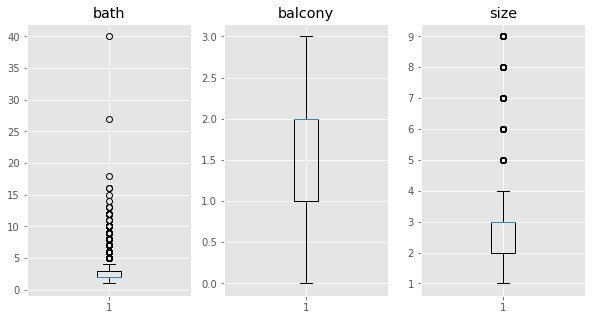

In [30]:
bath=df['bath'].dropna()
balcony=df['balcony'].dropna()
size=df['new_size'].dropna()
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
ax1.boxplot(bath)
ax1.set_title("bath")
ax2.boxplot(balcony)
ax2.set_title("balcony")
ax3.boxplot(size)
ax3.set_title("size")
plt.show()

In the 'bath' column we have 'outliers', all the obseravations greater than 5 is outlier here, so drop those rows which are corresponding to bath>=5

In [65]:
px.box(df['total_sqft'],labels={"variable":""},title="total sqft")

In [32]:
px.box(df['price'],labels={"variable":""},title="Price")

In [33]:
df_bath_del=df[df['bath']<5.0]
## subsetting the data wrt a column bath<5
df_size_del=df_bath_del[df_bath_del['new_size']<5]
## subsetting the data wrt a column new_size<5
df_sqft_del=df_size_del[df_size_del['total_sqft']<=2550]
## the value of upper fence in total_sqft boxplot is 2550

df_price_del=df_sqft_del[df_sqft_del['price']<=225]
df_price_del.shape

(11038, 255)

In [34]:
df_price_del.drop('society',axis=1,inplace=True)

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df_final=df_price_del.copy()
## check point

In [36]:
df_final.head()

total_sqft  bath  balcony  Carpet Area  Plot Area  Super built-up Area  \
0      1056.0   2.0      1.0            0          0                    1   
2      1440.0   2.0      3.0            0          0                    0   
3      1521.0   3.0      1.0            0          0                    1   
4      1200.0   2.0      1.0            0          0                    1   
5      1170.0   2.0      1.0            0          0                    1   

   new_size  quater1  quater2  quater3  ...  Vijayanagar  \
0       2.0        0        0        0  ...            0   
2       3.0        0        0        0  ...            0   
3       3.0        0        0        0  ...            0   
4       2.0        0        0        0  ...            0   
5       2.0        0        0        0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   
5                     0                   0            0           1   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  
5               0          0                   0            0             0  

[5 rows x 254 columns]

In [37]:
df_final.isnull().sum()

total_sqft              0
bath                    0
balcony               205
Carpet Area             0
Plot Area               0
                     ... 
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 254, dtype: int64

In [38]:
df_final.dropna(inplace=True)
df_final.reset_index(drop=True,inplace=True)
df_final.shape

(10833, 254)

In [39]:
df_final.head()

total_sqft  bath  balcony  Carpet Area  Plot Area  Super built-up Area  \
0      1056.0   2.0      1.0            0          0                    1   
1      1440.0   2.0      3.0            0          0                    0   
2      1521.0   3.0      1.0            0          0                    1   
3      1200.0   2.0      1.0            0          0                    1   
4      1170.0   2.0      1.0            0          0                    1   

   new_size  quater1  quater2  quater3  ...  Vijayanagar  \
0       2.0        0        0        0  ...            0   
1       3.0        0        0        0  ...            0   
2       3.0        0        0        0  ...            0   
3       2.0        0        0        0  ...            0   
4       2.0        0        0        0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           1   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 254 columns]

** Checking assumptions of Linear Regression **

# Checking homoscadasticity

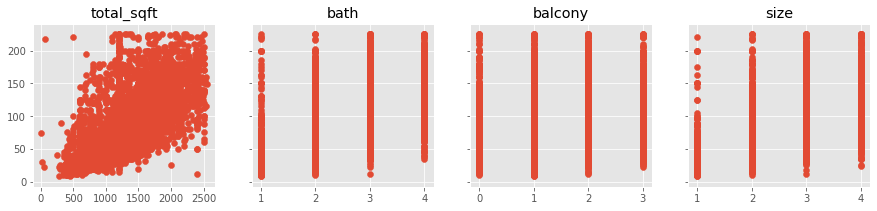

In [40]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(15,3))
ax1.scatter(df_final['total_sqft'],df_final['price'])
ax1.set_title("total_sqft")
ax2.scatter(df_final['bath'],df_final['price'])
ax2.set_title("bath")
ax3.scatter(df_final['balcony'],df_final['price'])
ax3.set_title("balcony")
ax4.scatter(df_final['new_size'],df_final['price'])
ax4.set_title("size")
plt.show()

As we can see from the scatter plots that variance in price increases as the values of the corresponding variables increase. Therefore we can say that the homoscadasticity assumption is violated, one remedy of this problem is log transformation.

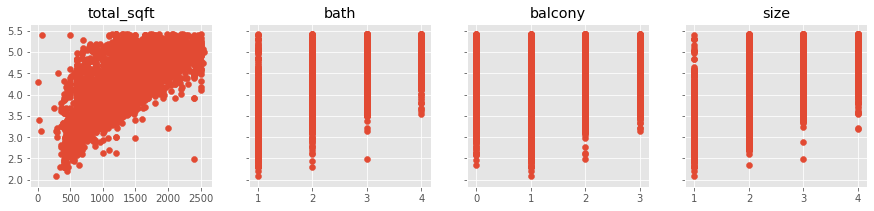

In [41]:
## log transformation
log_price=np.log(df_final['price'])
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(15,3))
ax1.scatter(df_final['total_sqft'],log_price)
ax1.set_title("total_sqft")
ax2.scatter(df_final['bath'],log_price)
ax2.set_title("bath")
ax3.scatter(df_final['balcony'],log_price)
ax3.set_title("balcony")
ax4.scatter(df_final['new_size'],log_price)
ax4.set_title("size")
plt.show()

# Checking Multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
var=df_final[['total_sqft', 'bath', 'balcony', 'Carpet Area', 'Plot Area',
       'Super built-up Area', 'new_size', 'quater1', 'quater2', 'quater3',
       'quater4', 'Ready To Move']]
VIF=pd.DataFrame()
VIF['vif']=[variance_inflation_factor(var.values,i) for i in range (var.shape[1])]
VIF['feature']=['total_sqft', 'bath', 'balcony', 'Carpet Area', 'Plot Area',
       'Super built-up Area', 'new_size', 'quater1', 'quater2', 'quater3',
       'quater4', 'Ready To Move',]
VIF

vif              feature
0   26.396769           total_sqft
1   38.946300                 bath
2    6.143018              balcony
3    1.040819          Carpet Area
4    1.704695            Plot Area
5    5.070734  Super built-up Area
6   41.529729             new_size
7    1.404914              quater1
8    2.177652              quater2
9    1.763064              quater3
10   2.194143              quater4
11  14.035873        Ready To Move

In practice, usually, a VIF > 5 or 10 indicates that the associated regression coefficients are poorly
estimated because of multicollinearity and we should drop them.

In [45]:
 df_final.drop(['bath','new_size'],axis=1,inplace=True)

In [46]:
## checking vif once again 
var=df_final[['total_sqft', 'balcony', 'Carpet Area', 'Plot Area',
       'Super built-up Area', 'quater1', 'quater2', 'quater3',
       'quater4', 'Ready To Move']]
VIF=pd.DataFrame()
VIF['vif']=[variance_inflation_factor(var.values,i) for i in range (var.shape[1])]
VIF['feature']=['total_sqft', 'balcony', 'Carpet Area', 'Plot Area',
       'Super built-up Area', 'quater1', 'quater2', 'quater3',
       'quater4', 'Ready To Move',]
VIF

vif              feature
0  13.312477           total_sqft
1   5.891268              balcony
2   1.039434          Carpet Area
3   1.477510            Plot Area
4   5.067394  Super built-up Area
5   1.351068              quater1
6   2.007438              quater2
7   1.663773              quater3
8   1.992183              quater4
9  12.181816        Ready To Move

For this model here we consider the 'total_Sqft' and 'ready to move' feature variables as they are seems to be important for predicting price 

## Checking Autocorrelation


- As this is not a time series data so auto correlation is not likely to be present.

# Standarization of variables

In [47]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin):
    def  __init__(self,columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self,X,y = None):
        self.scaler.fit(X[self.columns],y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self,X,y = None,copy = None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]),columns = self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled,X_scaled],axis = 1)[init_col_order]

In [48]:
columns_to_scale=['total_sqft','balcony']
df_scaler=CustomScaler(columns_to_scale)
df_scaler.fit(df_final)
scaled_inputs=df_scaler.transform(df_final)
scaled_inputs.drop('price',axis=1,inplace=True)
scaled_inputs.head()

total_sqft   balcony  Carpet Area  Plot Area  Super built-up Area  quater1  \
0   -0.615312 -0.704955            0          0                    1        0   
1    0.406867  1.853858            0          0                    0        0   
2    0.622482 -0.704955            0          0                    1        0   
3   -0.231995 -0.704955            0          0                    1        0   
4   -0.311853 -0.704955            0          0                    1        0   

   quater2  quater3  quater4  Ready To Move  ...  Vijayanagar  \
0        0        0        1              0  ...            0   
1        0        0        0              1  ...            0   
2        0        0        0              1  ...            0   
3        0        0        0              1  ...            0   
4        0        0        0              1  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           1   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 251 columns]

# Declaring inputs and targets

In [49]:
inputs=scaled_inputs
targets=np.log(df_final['price'])

# Train & Test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,random_state=20,train_size=0.8)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8666, 251)
(2167, 251)
(8666,)
(2167,)


# Linear Regression


In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.6914951773057312

In [53]:
y_hat=reg.predict(x_train)

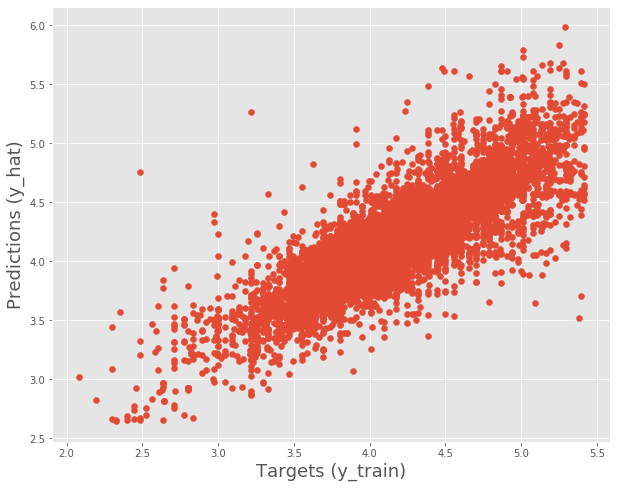

In [54]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

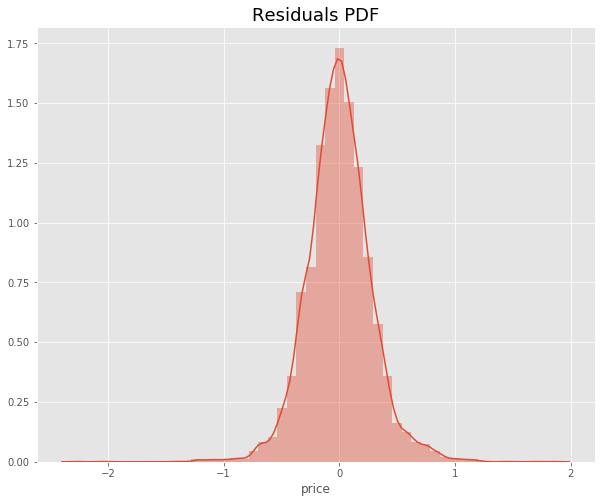

In [55]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
## here 'price' is basically log(price)

As we can see from the distribution plor of residual that it seems to be normal with mean zero and constant variance, but it has a larger tail in direction of negativ evalues, which implies that our predictions are overestimated.

# Intercept and coefficients of linear model

In [56]:
print(reg.intercept_)
print(reg.coef_)

4.1649357694637406
[ 3.25948463e-01  2.36334920e-03  1.27454101e-01  4.87954366e-01
 -8.39744053e-03  4.37688066e-02 -2.98278653e-02 -6.14641929e-02
 -4.33534615e-02 -6.39230663e-03  6.44594161e-01  4.24842891e-01
 -2.24519136e-01  6.80607393e-01  1.49041761e-01  2.86404435e-02
  3.46612111e-01  1.28058179e-01 -5.42601799e-02 -8.82881622e-02
 -3.66436299e-02 -2.73425746e-01 -1.06440870e-02  1.39887148e-01
  1.50991683e-01 -1.61268353e-03 -2.59933880e-01 -4.73930885e-01
 -6.44176056e-01 -2.56815095e-01 -1.73411745e-02  1.05437137e-02
 -7.32376522e-01 -4.35919654e-02  1.89274669e-01  9.41213303e-02
 -2.57948241e-01  2.16838709e-01  2.05924694e-01  2.97401415e-02
  4.72800177e-01  2.20305002e-01 -3.21830520e-01  2.41899791e-01
  2.46671052e-02 -2.80608870e-02  2.37165545e-02  1.37176548e-02
  5.26986258e-01  4.03038877e-01 -1.53298145e-01 -3.68288720e-01
 -2.75462172e-01  2.30949453e-03  5.42498115e-01 -6.85947537e-02
  1.33893757e-01  1.15101800e-01  5.64292289e-01 -2.21621626e-01
 -1.44

In [57]:
table=pd.DataFrame()
table['features']=inputs.columns.values
table['coefficients']=reg.coef_.T

table.index=table.index+1
table.loc[0]=['intercept',reg.intercept_]
table=table.sort_index()
table

features  coefficients
0             intercept      4.164936
1            total_sqft      0.325948
2               balcony      0.002363
3           Carpet Area      0.127454
4             Plot Area      0.487954
..                  ...           ...
247      Yelachenahalli      0.135619
248           Yelahanka     -0.057135
249  Yelahanka New Town     -0.261256
250         Yelenahalli     -0.242447
251        Yeshwanthpur      0.182649

[252 rows x 2 columns]

# Testing

In [58]:
reg.fit(x_test,y_test)
reg.score(x_test,y_test)

0.737281690978366

In [59]:
y_hat_test=reg.predict(x_test)

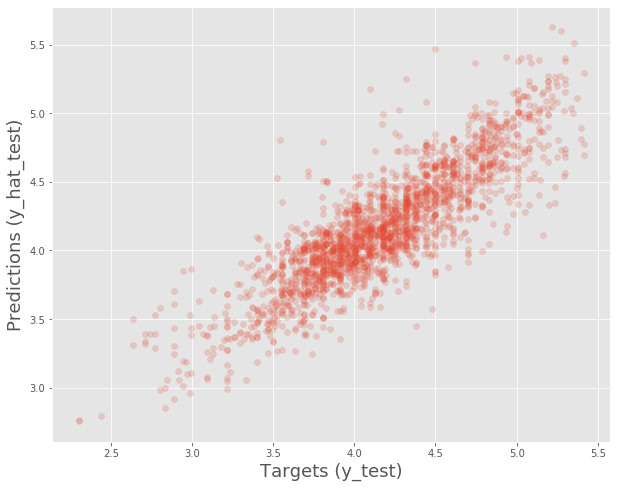

In [64]:
plt.scatter(y_test, y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

As we can see from the above scatter plot of target vs predicted scatterplot of test data, that the middle portions are well predicted by our model but the upper and lower portion are quite dispersed, that means these portions are not well predicted. So, we can manipulate the model to get a better prediction.

In [61]:
predict_table=pd.DataFrame()
predict_table["targets values of test data"]=np.exp(y_test)
predict_table["predicted values of test data"]=np.exp(y_hat_test)
predict_table.reset_index(drop=True,inplace=True)
predict_table

targets values of test data  predicted values of test data
0                           60.00                      37.243779
1                           42.60                      42.469033
2                           40.47                      39.165893
3                           24.00                      27.069120
4                           40.39                      39.424477
...                           ...                            ...
2162                        68.38                      55.412619
2163                       150.00                     175.611660
2164                        59.00                      65.497616
2165                        98.00                      85.268473
2166                        58.00                      49.850317

[2167 rows x 2 columns]

In [62]:
predict_table['residual']=predict_table["targets values of test data"]-predict_table["predicted values of test data"]
predict_table['difference %']=np.absolute((predict_table['residual']/predict_table["targets values of test data"])*100)

predict_table

targets values of test data  predicted values of test data   residual  \
0                           60.00                      37.243779  22.756221   
1                           42.60                      42.469033   0.130967   
2                           40.47                      39.165893   1.304107   
3                           24.00                      27.069120  -3.069120   
4                           40.39                      39.424477   0.965523   
...                           ...                            ...        ...   
2162                        68.38                      55.412619  12.967381   
2163                       150.00                     175.611660 -25.611660   
2164                        59.00                      65.497616  -6.497616   
2165                        98.00                      85.268473  12.731527   
2166                        58.00                      49.850317   8.149683   

      difference %  
0        37.927035  
1         0.307435  
2         3.222404  
3        12.787999  
4         2.390501  
...            ...  
2162     18.963705  
2163     17.074440  
2164     11.012908  
2165     12.991354  
2166     14.051178  

[2167 rows x 4 columns]

In [63]:
pd.set_option('display.float_format',lambda x:'%0.2f' % x)
predict_table.sort_values(by=['difference %'])

targets values of test data  predicted values of test data  residual  \
1899                        48.00                          48.00      0.00   
556                        140.00                         140.00      0.00   
706                         32.00                          32.00     -0.00   
1118                        79.00                          79.00      0.00   
1371                        57.00                          56.99      0.01   
...                           ...                            ...       ...   
1544                        90.00                         236.57   -146.57   
1112                        45.00                         120.71    -75.71   
1568                        34.00                          92.55    -58.55   
267                         60.00                         177.39   -117.39   
968                         34.50                         121.77    -87.27   

      difference %  
1899          0.00  
556           0.00  
706           0.00  
1118          0.01  
1371          0.01  
...            ...  
1544        162.86  
1112        168.24  
1568        172.21  
267         195.64  
968         252.96  

[2167 rows x 4 columns]